In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys
import seaborn as sns
sys.path.append('../src/')
sys.path.append('../src/exp_004')
from preprocess import read_data, get_data

In [3]:
train, test, submit = read_data()

In [4]:
train.head()

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063


In [5]:
train.City.nunique()

239

In [6]:
test.City.nunique()

63

In [7]:
train.lon.nunique(), train.lat.nunique()

(238, 239)

In [17]:
train.groupby('Country')['pm25_mid'].agg(['mean', 'count']).sort_values('mean')

,mean,count
Country,,
Canada,31.420618,1055
Australia,37.362265,5656
United Kingdom,40.405919,3279
Belgium,43.043318,2773
Japan,43.794998,25625
United States,44.830203,8649
Spain,44.911470,8139
France,45.301979,2872
Iran,45.459254,2706


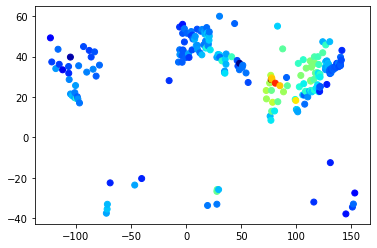

In [12]:
import matplotlib.pyplot as plt
pm25_location = train.groupby(['lon', 'lat'])['pm25_mid'].mean().reset_index()
plt.scatter(pm25_location.lon, pm25_location.lat, c=pm25_location['pm25_mid'], cmap='jet', alpha=1.0) 

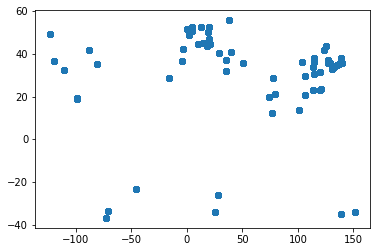

In [9]:
plt.scatter(test.lon, test.lat) 